## Homework 1

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split

### 1. Model Statement and Data Collection

Link to the datasets: https://www.kaggle.com/uciml/glass

Goal of the model: identify different types of glass from the dataset; want to predict the type of the glass with the variables given.

Variables: RI: refractive index, 
           Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10),
           Mg: Magnesium,
           Al: Aluminum,
           Si: Silicon,
           K: Potassium,
           Ca: Calcium,
           Ba: Barium,
           Fe: Iron,
           Type of glass: (class attribute) 

#### Read in the dataset and display the beginning and ending observations.

In [7]:
glass = pd.read_csv("glass.csv") # Read in the dataset
print(glass.head()) # Display the beginning observations
print(glass.tail()) # Display the ending observations

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
          RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7


### 2. Exploratory Data Analysis and Data Preprocessing

#### Variables: 
* RI: refractive index 
* Na: Sodium (unit measurement: weight percent in corresponding oxide)
* Mg: Magnesium (unit measurement: weight percent in corresponding oxide)
* Al: Aluminum (unit measurement: weight percent in corresponding oxide)
* Si: Silicon (unit measurement: weight percent in corresponding oxide)
* K: Potassium (unit measurement: weight percent in corresponding oxide)
* Ca: Calcium (unit measurement: weight percent in corresponding oxide)
* Ba: Barium (unit measurement: weight percent in corresponding oxide)
* Fe: Iron (unit measurement: weight percent in corresponding oxide)
* Type: type of the glass

Dependent variables: Type

Independent variables: RI, Na, Mg, Al, Si, K, Ca, Ba, Fe

All the independent variables are quantitative.

#### Check for missing values and process them as needed.

In [10]:
glass.isnull().values.any() # Check if there's any null value

False

#### Descriptive statistics.

In [11]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Visualizations.

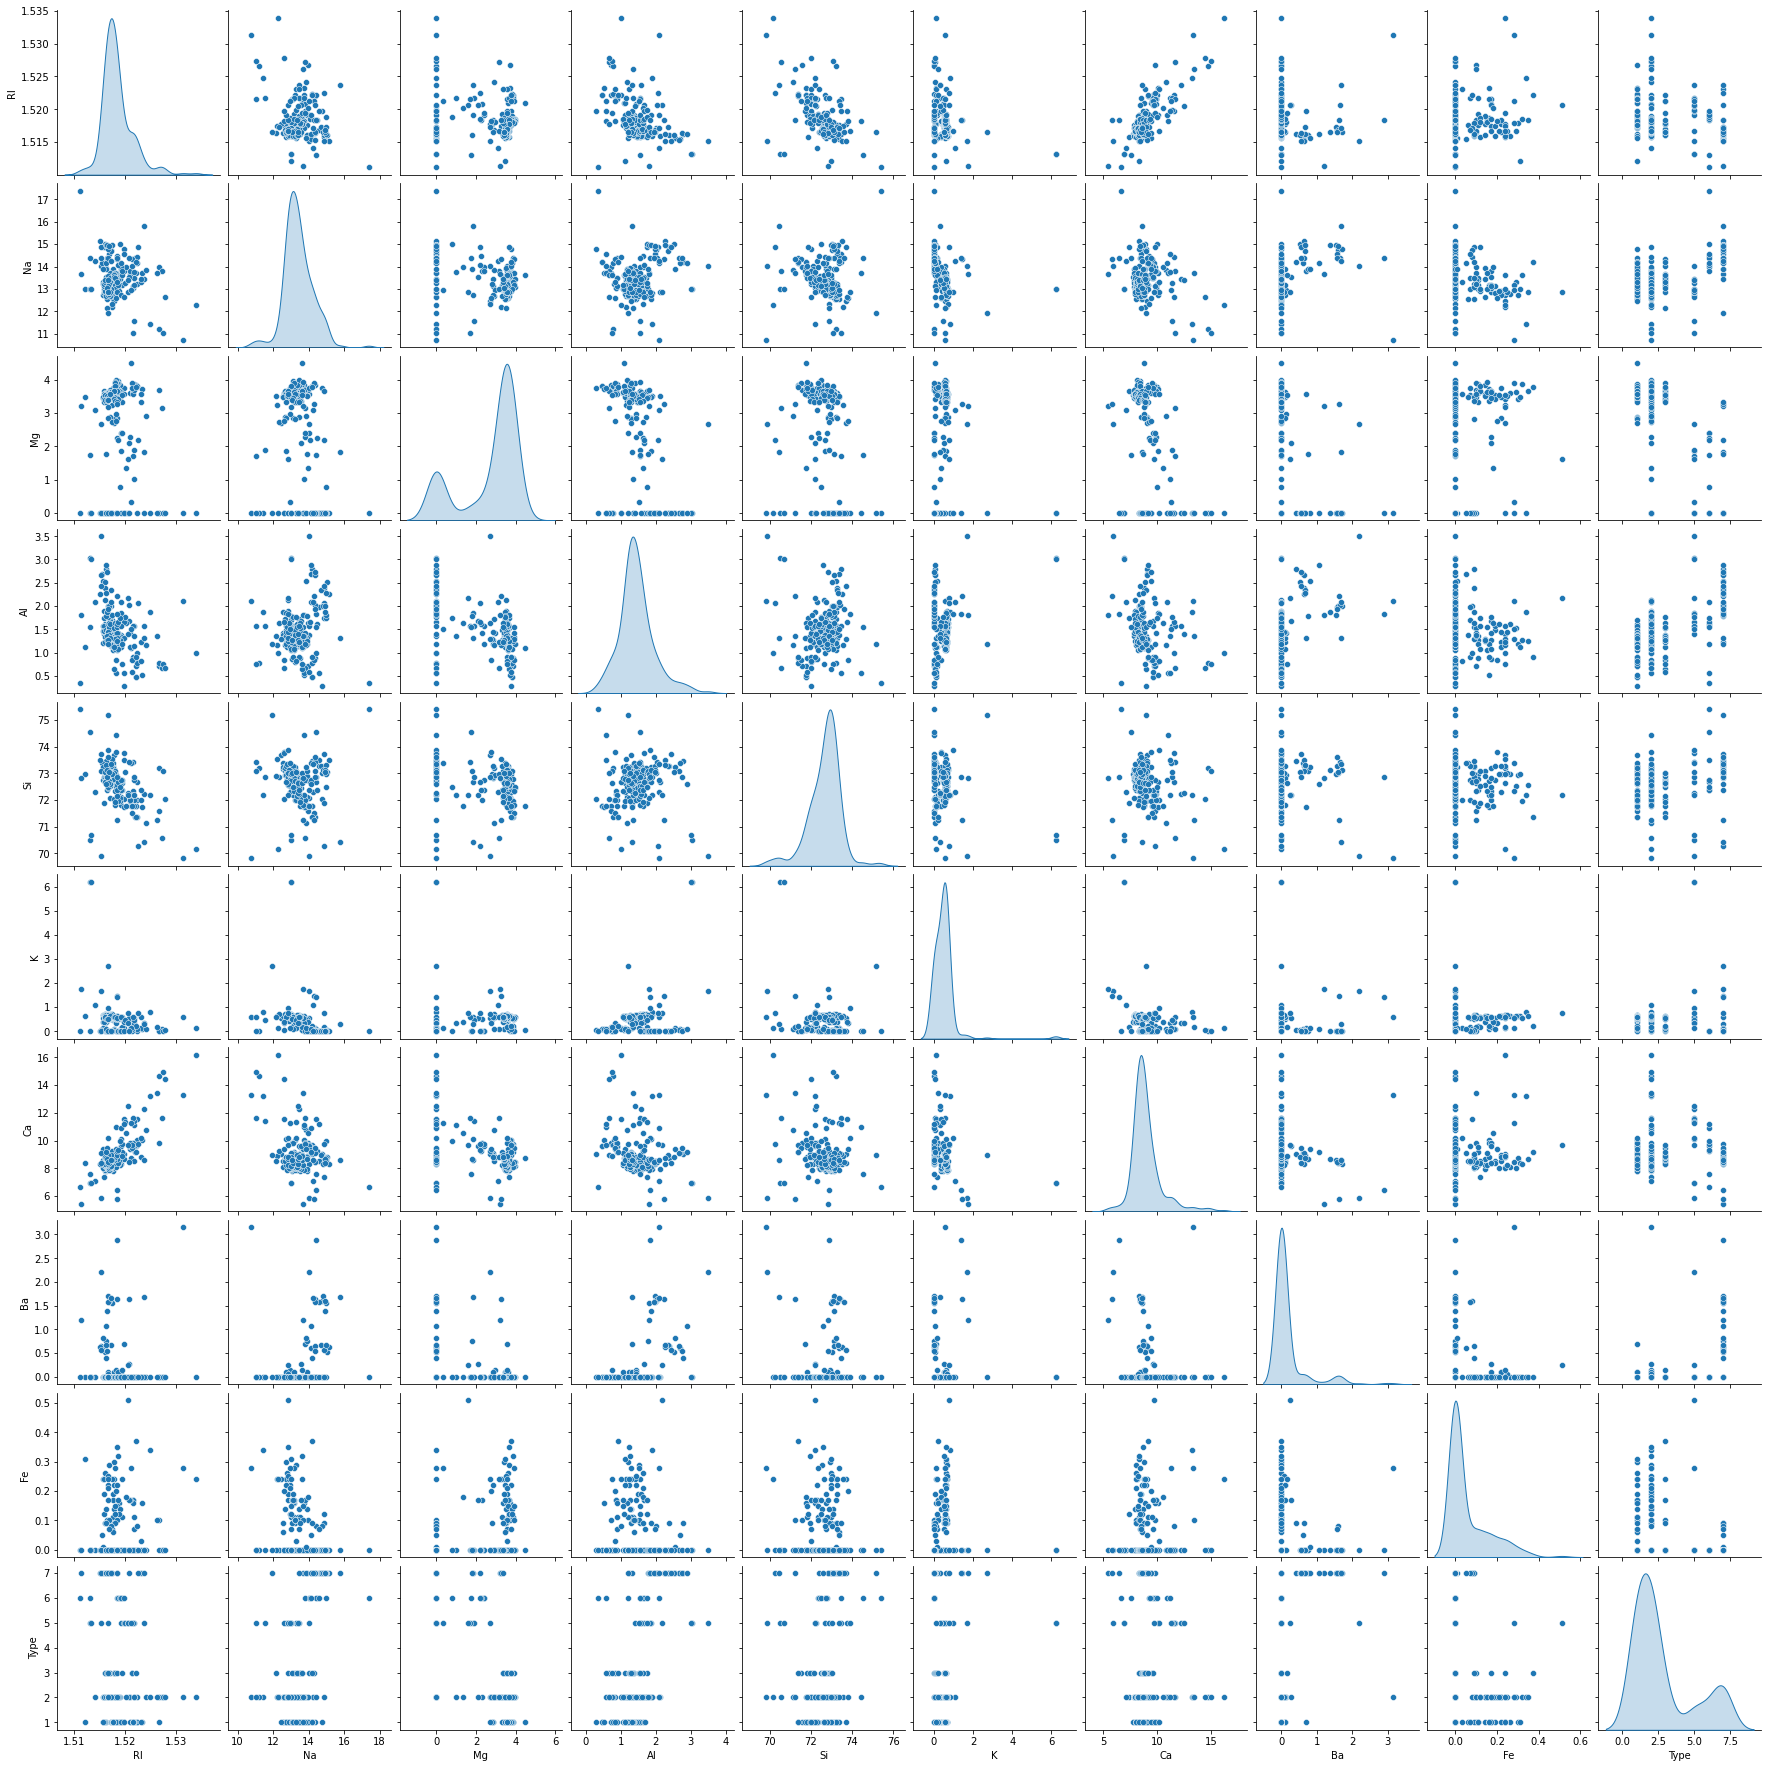

In [12]:
sns.pairplot(data=glass, diag_kind="kde")

#### Correlations of variables. 

In addition to the code there should be some brief statements of your interpretation of the statistics and the plots. For example, you may notice a non-linear relationship.

In [13]:
glass.drop(columns=["Type"]).corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


#### Encode the qualitative variables if needed.

Since all the independent variables are quantitative, we do not need to encode.

#### Split the dataset into training and test sets.

In [17]:
# Separate all independent & dependent variables
X = glass.iloc[:,:-1].values
y = glass.loc[:,'Type']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 9), (43, 9), (171,), (43,))

#### Scale the variables  or statement why no need to scale.

In [20]:
sc = StandardScaler()
X_train[:,1:] = sc.fit_transform(X_train[:,1:])
X_test[:,1:] = sc.transform(X_test[:,1:])

X_train[0:5,:]

array([[ 1.52152   , -0.33807104,  0.60727823, -1.08799804, -0.58603232,
        -0.45877728,  0.63637827, -0.34991145,  0.9584952 ],
       [ 1.52152   , -0.42091056,  0.65669777, -1.14976002, -0.560271  ,
        -0.53084978,  0.65815693, -0.34991145,  1.05735086],
       [ 1.53125   , -3.16644882, -1.92017834,  1.38248108, -3.6645098 ,
         0.17185709,  3.16270238,  5.62977777,  2.14476308],
       [ 1.51694   , -0.64576068,  0.60727823, -0.24391767, -0.0579253 ,
         0.22591146, -0.11135558, -0.34991145, -0.62319531],
       [ 1.5164    , -1.01262139,  0.53667888,  0.90897258,  0.74067555,
         0.26194771, -0.62678378, -0.34991145,  0.2665056 ]])

### 3. Applying the algorithms

#### Create the model and fit to training data. 

In [22]:
model = LogisticRegression(random_state = 12)
model.fit(X_train, y_train)

LogisticRegression(random_state=12)

#### Display the coefficients.

In [23]:
model.coef_

array([[ 3.73631714e-03, -6.61972712e-01,  1.59786956e+00,
        -1.31584115e+00,  6.10911020e-02, -8.68426392e-03,
         4.69103628e-02, -2.32703459e-01,  1.77120775e-01],
       [ 1.88183088e-03, -9.38646849e-01,  1.10103416e-02,
        -1.17081820e-01, -6.32522217e-01,  2.49850293e-01,
        -2.24813124e-01,  1.47637888e-01,  4.55617959e-01],
       [-1.04626371e-02,  1.14047869e-01,  7.64395127e-01,
        -9.08181646e-01, -2.69176651e-01, -3.60123305e-01,
        -1.69369966e-01, -5.33969134e-02,  2.59090447e-01],
       [-1.64087465e-03, -8.84464189e-01, -7.80686749e-01,
         1.73422436e+00, -2.30814183e-01,  7.15022537e-01,
         4.80789764e-01, -8.54947880e-02, -8.54250813e-02],
       [-9.12744658e-04,  1.40481123e+00, -4.10236672e-01,
        -1.43507321e-02,  6.19515358e-01, -1.22864930e+00,
         9.43410550e-02, -7.36965475e-01, -5.59783016e-01],
       [ 7.39810839e-03,  9.66224649e-01, -1.18235160e+00,
         6.21230988e-01,  4.51906591e-01,  6.325840

#### Interpret the coefficients. (text)

#### Predict to test set.

In [24]:
y_preds = model.predict(X_test)

### 4. Results

#### Display the confusion matrix for the test and the training data.

In [27]:
cm_test = confusion_matrix(y_test,y_preds)
print("Confusion Matrix for Test Data:")
print(cm_test)
y_train_preds = model.predict(X_train)
cm_train = confusion_matrix(y_train,y_train_preds)
print("Confusion Matrix for Training Data:")
print(cm_train)

Confusion Matrix for Test Data:
[[ 9  5  0  0  0  0]
 [ 0 13  0  0  2  0]
 [ 0  3  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 1  0  0  0  0  1]
 [ 0  0  0  0  0  6]]
Confusion Matrix for Training Data:
[[41 15  0  0  0  0]
 [18 42  0  1  0  0]
 [10  4  0  0  0  0]
 [ 0  3  0  6  0  1]
 [ 0  1  0  0  6  0]
 [ 1  1  0  0  0 21]]


#### Calculate the accuracy, precision,recall and F1 of the test data. 

In [32]:
print(f'Accuracy: {np.trace(cm_test)/np.sum(cm_test)}')
print(f'Precision: {cm_test[1,1]/(cm_test[1,1]+cm_test[0,1])}')
print(f'Recall: {cm_test[1,1]/(cm_test[1,1] + cm_test[1,0])}')

Accuracy: 0.6744186046511628
Precision: 0.7222222222222222
Recall: 1.0


#### Display a ROC curve and calculate the AUC. 

(43, 9) (43, 6)


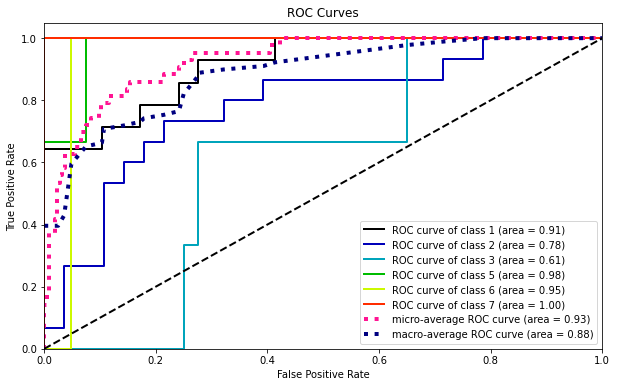

In [33]:
y_probas = model.predict_proba(X_test) # predicted probabilities 
print(X_test.shape,y_probas.shape)
y_probas[0].round(6)

import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, y_probas,figsize=(10,6));

#### Provide an explanation and interpretation of the results. (text)